In [1]:
# dataset from meta adv.

In [2]:
import pandas as pd

results = pd.read_csv('results.csv')
advertisers = pd.read_csv('advertisers.csv')
locations = pd.read_csv('locations.csv')

In [3]:
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [4]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [5]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [6]:
results['State'] = results['State'].str.strip().str.lower()
locations['Location name'] = locations['Location name'].str.strip().str.lower()

In [8]:
merged_data = results.merge(
    locations ,
    left_on = 'State',
    right_on = 'Location name',
    how = 'left'
)
merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


In [9]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [ ]:
# total ad spend by state

state_ad_spend = merged_data.groupby('State')

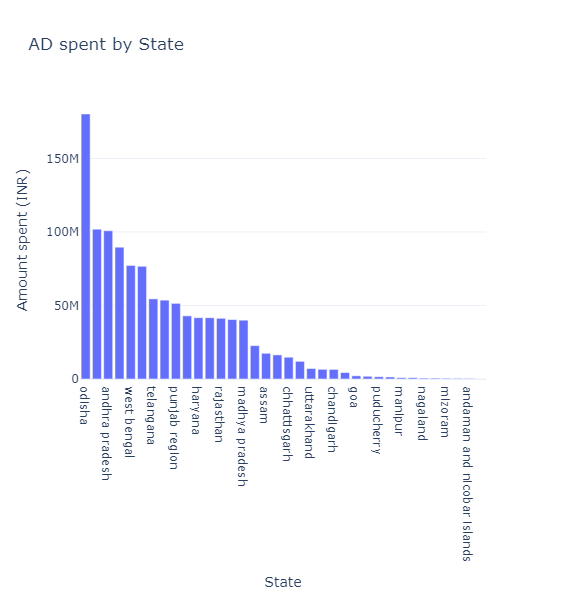

In [16]:
fig = px.bar(locations , x = 'Location name' , y = 'Amount spent (INR)',
             labels = {'Location name' : 'State' , 'Amount spent (INR)' : 'Amount spent (INR)'},
             title = 'AD spent by State')
fig.update_layout(xaxis = {'categoryorder' : 'total descending'},
                  width = 800 , height = 600)
fig.show()

Odisha leads significantly with the highest ad spend ,
bar graph indicates that larger and more populous states tend to spend more on ads , likely reflecting their greater political significance and larger voter base

### average voter turnout by state :

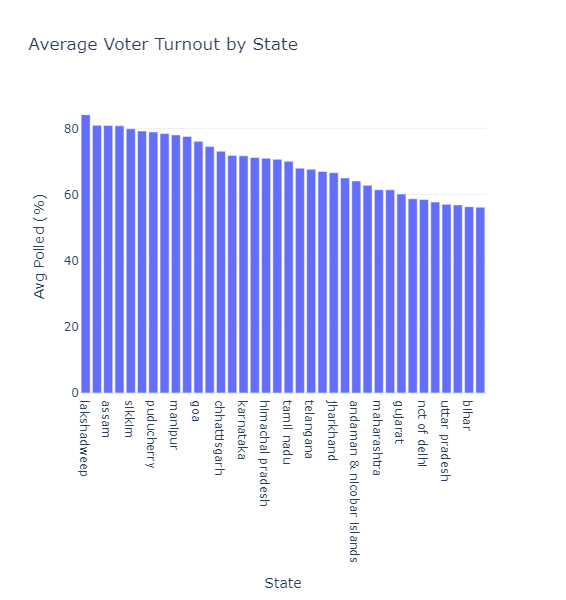

In [20]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().reset_index()

fig = px.bar( state_voter_turnout , x = 'State' , y = 'Polled (%)',
             labels = {'State' :'State' , 'Polled (%)' : 'Avg Polled (%)'},
             title = 'Average Voter Turnout by State')

fig.update_layout( xaxis = { 'categoryorder' : 'total descending' },
                  width = 800 ,
                  height = 600 )
fig.show()

Lakshadweep has the highest average voter turnout ,
indicates -> some smaller states and union territories exhibiting higher engagement compared to larger states with higher spend

### Analysis of top 5 parties spend:

In [24]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'],
                                                  errors = 'coerce')
advertisers.dropna(subset = ['Amount spent (INR)'] , inplace = True)

In [27]:
party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending = False)

top_5_parties = party_ad_spend.head(5).reset_index()

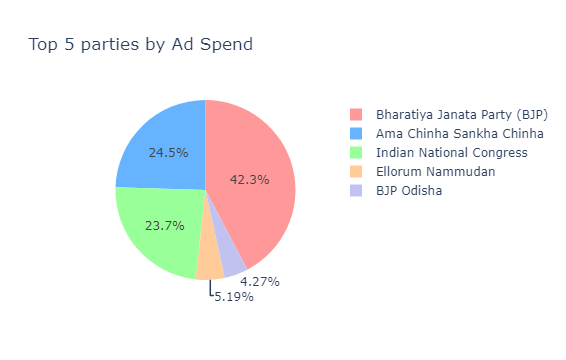

In [36]:
#pie chart

colors = ['#ff9999' , '#66b3ff'  ,'#99ff99' , '#ffcc99' , '#c2c2f0']

fig= px.pie(top_5_parties , values = 'Amount spent (INR)' , names = 'Page name',
            title = 'Top 5 parties by Ad Spend' , color_discrete_sequence = colors,
            labels = {'Page name' : 'Political Party' , 'Amount spent (INR)' : 'Ad spend (INR)'})

fig.update_traces(textinfo = 'percent')
fig.show()

BJP dominates in terms of ad spending on Facebook and Instagram ads , 
with nearly half of total expenditure , suggesting a significant investment in advertising compared to other parties

### Relation between ad spend and voter turnout

In [38]:
corr = merged_data[['Amount spent (INR)' , 'Polled (%)']].corr()
print(corr)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


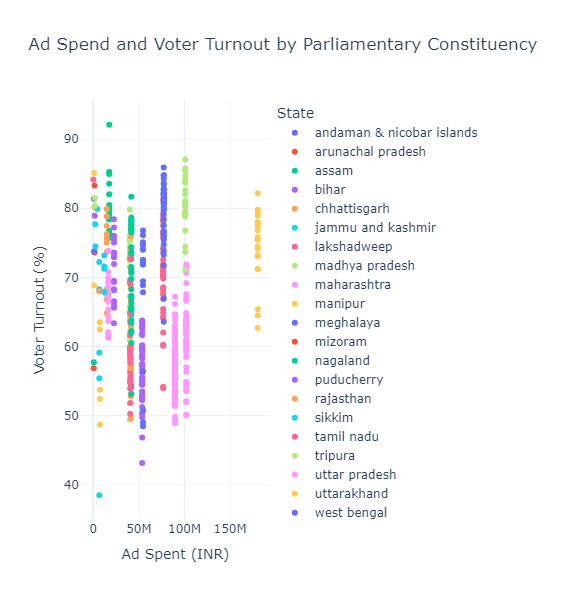

In [39]:
# relationship between ad spend and voter turnout by parliameentary constituency

merged_constituency_data = results.merge(
    locations , 
    left_on = 'State',
    right_on = 'Location name',
    how = 'left'
)

fig = px.scatter(merged_constituency_data ,
                 x = 'Amount spent (INR)',
                 y = 'Polled (%)',
                 color = 'State',
                 labels = {'Amount spent (INR)' : 'Ad Spent (INR)' , 'Polled (%)' : 'Voter Turnout (%)'},
                 title = 'Ad Spend and Voter Turnout by Parliamentary Constituency')

fig.update_layout(width = 800 , height = 600)

fig.show()